# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#API Info

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [22]:
#Loop through the randomly selected cities in the CSV file and get the weather data
city_name = []
id_number = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []


for city in cities:
    try: 
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        time.sleep(1)
        city_name.append(weather_json['name'])
        id_number.append(weather_json['id'])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])     
        #print(f"Testing city name output: {name}")
        #print(f"Testing city number output: {id_number}")
    except:
        #print("Keyerror ignore")
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Create a dataframe from the weather info
cities_weather = ({"City Name": city_name,
                  "Lat": lat,
                  "Lon": lon,
                  "Max Temp": max_temp,
                  "Humidity": humidity,
                  "Cloudiness": clouds,
                  "Wind Speed": wind_speed,
                  "Country": country,
                  "Date": date})

cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shingū,33.7333,135.9833,69.04,92,23,3.56,JP,1633617930
1,Deputatsky,69.3000,139.9000,18.64,76,100,7.14,RU,1633617931
2,Port Alfred,-33.5906,26.8910,70.25,81,84,31.97,ZA,1633617933
3,Ushuaia,-54.8000,-68.3000,44.26,49,40,4.61,AR,1633617698
4,Vao,-22.6667,167.4833,68.58,65,8,15.73,NC,1633617935
...,...,...,...,...,...,...,...,...,...
557,Jieshi,22.8134,115.8257,80.94,86,100,18.41,CN,1633618833
558,Emerald,-23.5333,148.1667,71.98,37,9,5.93,AU,1633618834
559,Stavropol,45.0428,41.9733,46.51,76,75,22.37,RU,1633618836
560,Khani,41.9563,42.9566,56.77,79,20,5.73,GE,1633618837


In [33]:
cities_weather_df.to_csv("../cities_weather.csv", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
#Find humidity greater than 100%
high_humidity = cities_weather_df.loc[cities_weather_df["Humidity"] > 100]
high_humidity


,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#There are no countries with humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

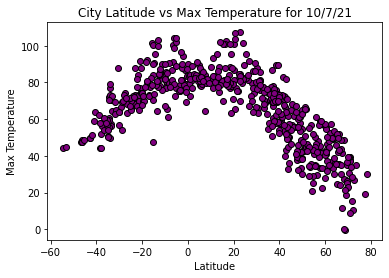

In [165]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")
plt.savefig("../Temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

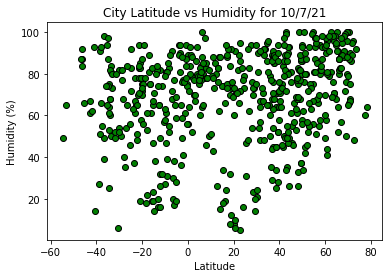

In [166]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")
plt.savefig("../Humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

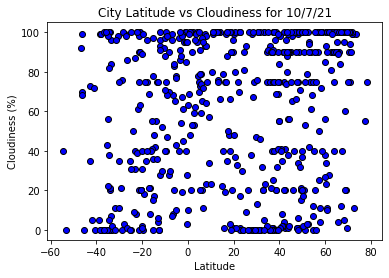

In [167]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")
plt.savefig("../Cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

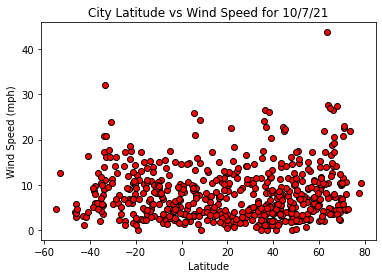

In [168]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors="black")
plt.savefig("../Wind_speed_plot.png")
plt.show()

## Linear Regression

In [169]:
#Dataframe for cities in northern hemisphere 
northern_cities = cities_weather_df.loc[cities_weather_df["Lat"] >= 0]
northern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shingū,33.7333,135.9833,69.04,92,23,3.56,JP,1633617930
1,Deputatsky,69.3000,139.9000,18.64,76,100,7.14,RU,1633617931
5,Tuchola,53.5879,17.8591,56.71,63,90,6.26,PL,1633617937
8,Albany,42.6001,-73.9662,66.54,89,1,1.45,US,1633617906
9,Acajutla,13.5928,-89.8275,88.14,62,100,4.25,SV,1633617943
...,...,...,...,...,...,...,...,...,...
555,Ust-Tsilma,65.4410,52.1498,49.78,64,89,11.88,RU,1633618829
556,Kailua,21.4022,-157.7394,75.07,71,33,22.62,US,1633618831
557,Jieshi,22.8134,115.8257,80.94,86,100,18.41,CN,1633618833
559,Stavropol,45.0428,41.9733,46.51,76,75,22.37,RU,1633618836


In [170]:
#Dataframe for cities in southern hemisphere 
southern_cities = cities_weather_df.loc[cities_weather_df["Lat"] < 0]
southern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port Alfred,-33.5906,26.8910,70.25,81,84,31.97,ZA,1633617933
3,Ushuaia,-54.8000,-68.3000,44.26,49,40,4.61,AR,1633617698
4,Vao,-22.6667,167.4833,68.58,65,8,15.73,NC,1633617935
6,Puerto Ayora,-0.7393,-90.3518,69.55,94,85,5.01,EC,1633617938
7,Bambous Virieux,-20.3428,57.7575,74.21,78,20,10.36,MU,1633617940
...,...,...,...,...,...,...,...,...,...
549,Owando,-0.4819,15.8999,87.22,56,95,3.80,CG,1633618818
550,Solwezi,-12.1688,26.3894,87.39,16,100,8.34,ZM,1633618820
553,Antalaha,-14.9003,50.2788,73.44,71,48,4.43,MG,1633618826
558,Emerald,-23.5333,148.1667,71.98,37,9,5.93,AU,1633618834


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7198452449975252


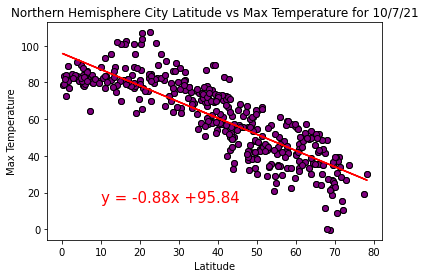

In [172]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")
plt.savefig("../Northern_temp_plot.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5652432477757776


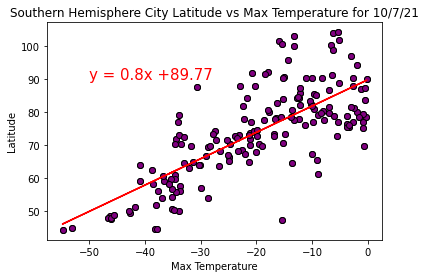

In [173]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_temp_plot.png")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027149670271919543


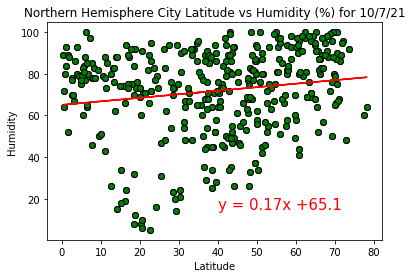

In [174]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs Humidity (%) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs Humidity (%) for 10/7/21")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_humidity_plot.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006051160050997923


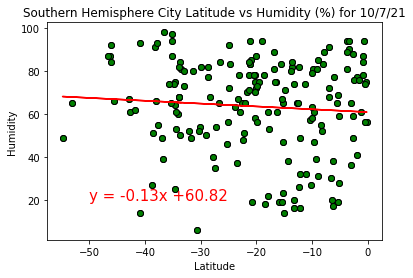

In [175]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs Humidity for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs Humidity (%) for 10/7/21")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_humidity_plot.png")

plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006257475148340914


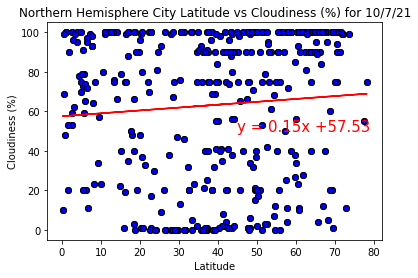

In [176]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%) for 10/7/21")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_cloud_plot.png")


plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04867717523098923


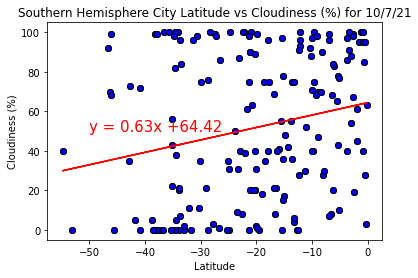

In [177]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%) for 10/7/21")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_cloud_plot.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01828014710191707


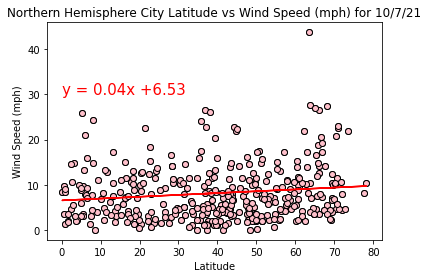

In [178]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph) for 10/7/21")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_wind_plot.png")


plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01600803884074769


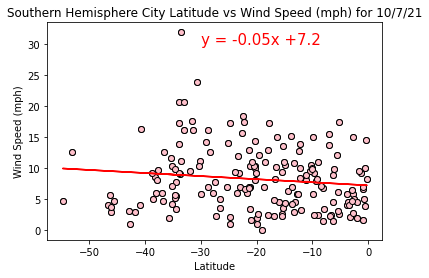

In [179]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")
#plt.show()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph) for 10/7/21")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_wind_plot")


plt.show()


